In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

In [2]:
billboard = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-08-26/billboard.csv")
billboard.head(2)

,song,artist,date,weeks_at_number_one,non_consecutive,rating_1,rating_2,rating_3,overall_rating,divisiveness,...,featured_in_a_then_contemporary_play,written_for_a_film,featured_in_a_then_contemporary_film,written_for_a_t_v_show,featured_in_a_then_contemporary_t_v_show,associated_with_dance,topped_the_charts_by_multiple_artist,double_a_side,eurovision_entry,u_s_artwork
0,Poor Little Fool,Ricky Nelson,1958-08-04T00:00:00Z,2,0,4,5,3,4.000000,1.333333,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Cannot Locate
1,Nel Blu Dipinto Di Blu,Domenico Modugno,1958-08-18T00:00:00Z,5,1,7,7,5,6.333333,1.333333,...,NaN,0,NaN,0,NaN,0,0,NaN,1,Cannot Locate


In [3]:
# Select columns
df = billboard[["song","artist", "date", "bpm"]]

In [4]:
# Convert date to datetime
df = df.copy()
df["datetime"] = pd.to_datetime(df["date"])
df["year"] = df["datetime"].dt.year
df = df.drop(columns=["date", "datetime"])
df.head(2)

,song,artist,bpm,year
0,Poor Little Fool,Ricky Nelson,155.0,1958
1,Nel Blu Dipinto Di Blu,Domenico Modugno,130.0,1958


In [5]:
# Function to assign categories and colors based on bpm value
def categorize_bpm(df):    
    def bpm_category(bpm):
        if bpm < 60:
            return "very slow", "#2c6ae4"
        elif 60 <= bpm < 80:
            return "slow", "#c8ff8a"
        elif 80 <= bpm < 120:
            return "normal", "#4be700"
        elif 120 <= bpm < 160:
            return "fast", "#f4cd17"
        else:
            return "very fast", "#c11a00"
    
    # Apply the function and unpack the results into new columns
    df[["bpm_category", "bpm_color"]] = df["bpm"].apply(lambda x: pd.Series(bpm_category(x)))
    
    return df

In [6]:
# Apply the categorize_bpm function
df = categorize_bpm(df)
df.head(2)

,song,artist,bpm,year,bpm_category,bpm_color
0,Poor Little Fool,Ricky Nelson,155.0,1958,fast,#f4cd17
1,Nel Blu Dipinto Di Blu,Domenico Modugno,130.0,1958,fast,#f4cd17


In [7]:
# Sort values
df = df.sort_values(by=["year", "bpm"])

In [8]:
# Count hits by year
group_counts = df.groupby("year").size()
group_counts.head(2)

year
1958     8
1959    15
dtype: int64

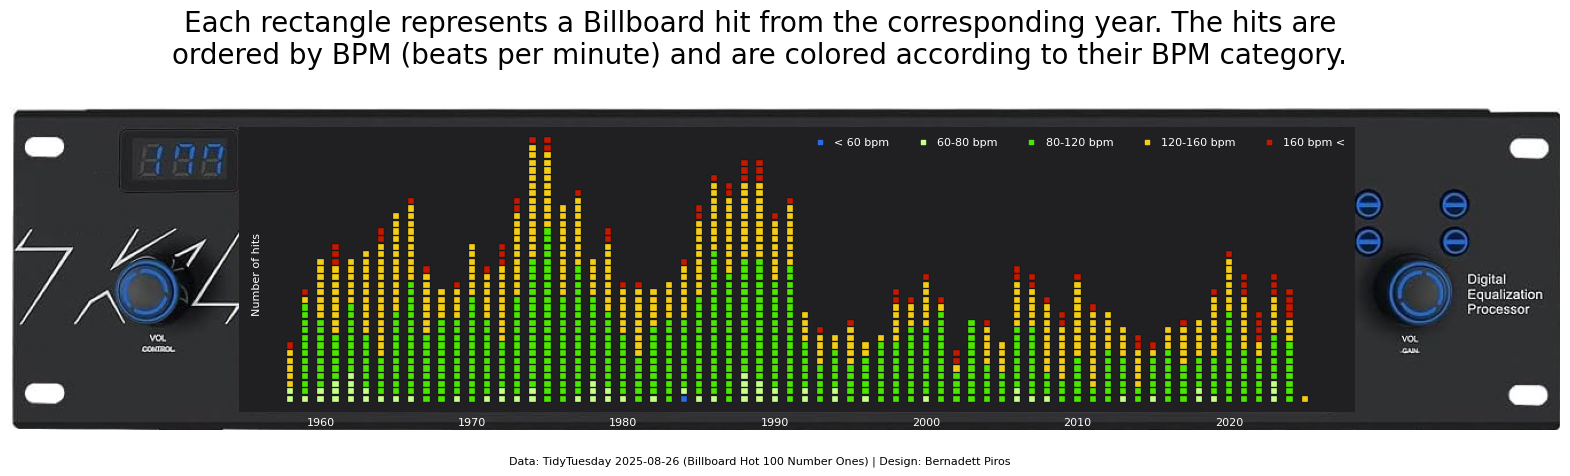

In [9]:
# Load image
image = Image.open("QuadEQ-Front2.jpg")
# Convert image to a np array 
image_np = np.array(image)

fig, ax = plt.subplots(figsize=(20, 10))
# Plot image in the main axis
ax.imshow(image)
ax.axis("off")

## Child ax 
child_ax = ax.inset_axes([0.148, 0.057, 0.72, 0.88])

# Loop through each unique year value and plot stacked dots
for year_value, count in group_counts.items():    
    sub_df = df[df["year"] == year_value]

    # Create a list where year is repeated with the corresponding count
    x_vals = [year_value] * count  
    # Stack dots from 1 vertically
    y_vals = np.arange(1, count + 1)  
    colors = sub_df["bpm_color"].values  
    
    # Dot plot
    scatter = child_ax.scatter(x_vals, y_vals, marker="s", s=20, c=colors, ec="black", lw=0.2)

# Axis style
child_ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
child_ax.tick_params(length=0)
child_ax.set_yticks([])

child_ax.tick_params(
  axis="x",
  labelsize=8,
  labelcolor="white",
)

child_ax.text(1955.5, 17.5, "Number of hits", color="white", size=8, va="center", rotation=90)

child_ax.set_facecolor("#202022")

## Legend
legend_sizes = [10, 10, 10, 10, 10]  
legend_labels = ["< 60 bpm", "60-80 bpm", "80-120 bpm", "120-160 bpm", "160 bpm <"]  # legend labels
legend_colors = ["#2c6ae4", "#c8ff8a", "#4be700", "#f4cd17", "#c11a00"]

# Create legend handles
legend_handles = [
    plt.scatter([], [], s=size, color=color, marker="s")  # Create invisible scatter points
    for size, color in zip(legend_sizes, legend_colors)
]

# Create the legend
legend = child_ax.legend(
    legend_handles,
    legend_labels,    
    loc="upper right",
    framealpha=0.3,
    facecolor="#202022",
    edgecolor="#202022",
    labelcolor="white",
    fontsize=8,
    labelspacing=0.2,
    ncol=5,
    handletextpad=0.3
)

## Texts
fig.text(0.5, 0.7, "Each rectangle represents a Billboard hit from the corresponding year. The hits are\nordered by BPM (beats per minute) and are colored according to their BPM category.",
        size=20, ha="center")

fig.text(0.5, 0.3, "Data: TidyTuesday 2025-08-26 (Billboard Hot 100 Number Ones) | Design: Bernadett Piros", size=8, ha="center")

plt.show()

#fig.savefig("2025-08-26.png", bbox_inches='tight', pad_inches=0.2)